In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [3]:
training_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")


In [4]:
training_data["outcome"].replace("euthanized", "died", inplace=True)


In [92]:
X = training_data.drop(columns=["outcome"])
y = training_data["outcome"]



In [93]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

object_column_X = X.select_dtypes(include=['object'])

for column in object_column_X:
    X[column] = label_encoder.fit_transform(X[column])
    

In [94]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Identify the numeric columns, excluding 'id'
numeric_columns = X.select_dtypes(include=['number']).columns.difference(['id'])

# Apply StandardScaler to the numeric columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


In [95]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size= 0.2, random_state=42)


In [97]:
# # Create the GradientBoostingClassifier model
gradient_model = GradientBoostingClassifier(random_state=42)

# # Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1],   # Learning rate
    'max_depth': [4, 6, 8],            # Maximum depth of the trees
}

# # Create the GridSearchCV object
grid_search = GridSearchCV(gradient_model, param_grid, cv=5, verbose=3, scoring='accuracy')

# # Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.783 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.693 total time=   1.4s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.735 total time=   1.9s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.701 total time=   1.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.716 total time=   1.8s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.802 total time=   4.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.708 total time=   5.7s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.749 total time=   3.7s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.744 total time=   2.7s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=300;, score=0.74

In [98]:
#best model with params
best_gradient_model = GradientBoostingClassifier(random_state = 42, verbose = 3, **best_params)

#fit the data
best_gradient_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2521           13.47s
         2           1.1411           11.70s
         3           1.0459           14.58s
         4           0.9685           15.25s
         5           0.8930           18.81s
         6           0.8285           24.95s
         7           0.7789           23.45s
         8           0.7247           27.00s
         9           0.6729           25.53s
        10           0.6241           28.52s
        11           0.5820           31.52s
        12           0.5447           29.81s
        13           0.5153           32.29s
        14           0.4862           32.15s
        15           0.4576           31.46s
        16           0.4358           30.89s
        17           0.4111           31.71s
        18           0.3876           30.53s
        19           0.3692           32.96s
        20           0.3497           34.15s
        21           0.3317           33.83s
        2

GradientBoostingClassifier(max_depth=8, n_estimators=500, random_state=42,
                           verbose=3)

In [99]:
#use the model to make predictions on X_test
y_pred = best_gradient_model.predict(X_test)

print(y_pred)

[1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 1]


In [100]:
# Calculate f-1 score
f1 = f1_score(y_test, y_pred, average='micro')
print("F1 Score:", f1)


F1 Score: 0.7962264150943396


In [101]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have true labels (y_test) and predicted labels (y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred, average='micro')

# Calculate recall
recall = recall_score(y_test, y_pred, average='micro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.80
Recall: 0.80


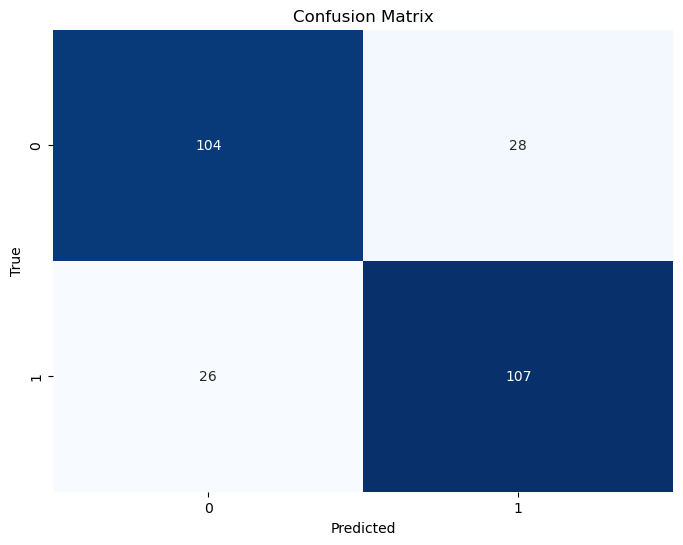

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_test) and predicted labels (y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [103]:
from sklearn.metrics import classification_report

# Assuming you have true labels (y_test) and predicted labels (y_pred)
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       132
           1       0.79      0.80      0.80       133

    accuracy                           0.80       265
   macro avg       0.80      0.80      0.80       265
weighted avg       0.80      0.80      0.80       265



In [104]:
#save the model
import joblib

# Save the trained model to a file
joblib.dump(best_gradient_model, 'gradient_model_train_data.pkl')

['gradient_model_train_data.pkl']

In [105]:
#load in the model 
loaded_model = joblib.load('gradient_model_train_data.pkl')


In [106]:
object_columns_test = test_data.select_dtypes(include=['object'])

# Iterate through categorical columns and encode them
for column in object_columns_test:
    test_data[column] = label_encoder.fit_transform(test_data[column])


In [107]:
numeric_columns_test = test_data.select_dtypes(include=['number']).columns

# Apply StandardScaler to the numeric columns
test_data[numeric_columns] = scaler.fit_transform(test_data[numeric_columns])


In [108]:
#check columns match
print(len(test_data.columns))
print(len(X_train.columns))

28
28


In [109]:
test_predictions = loaded_model.predict(test_data)

test_predictions

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,

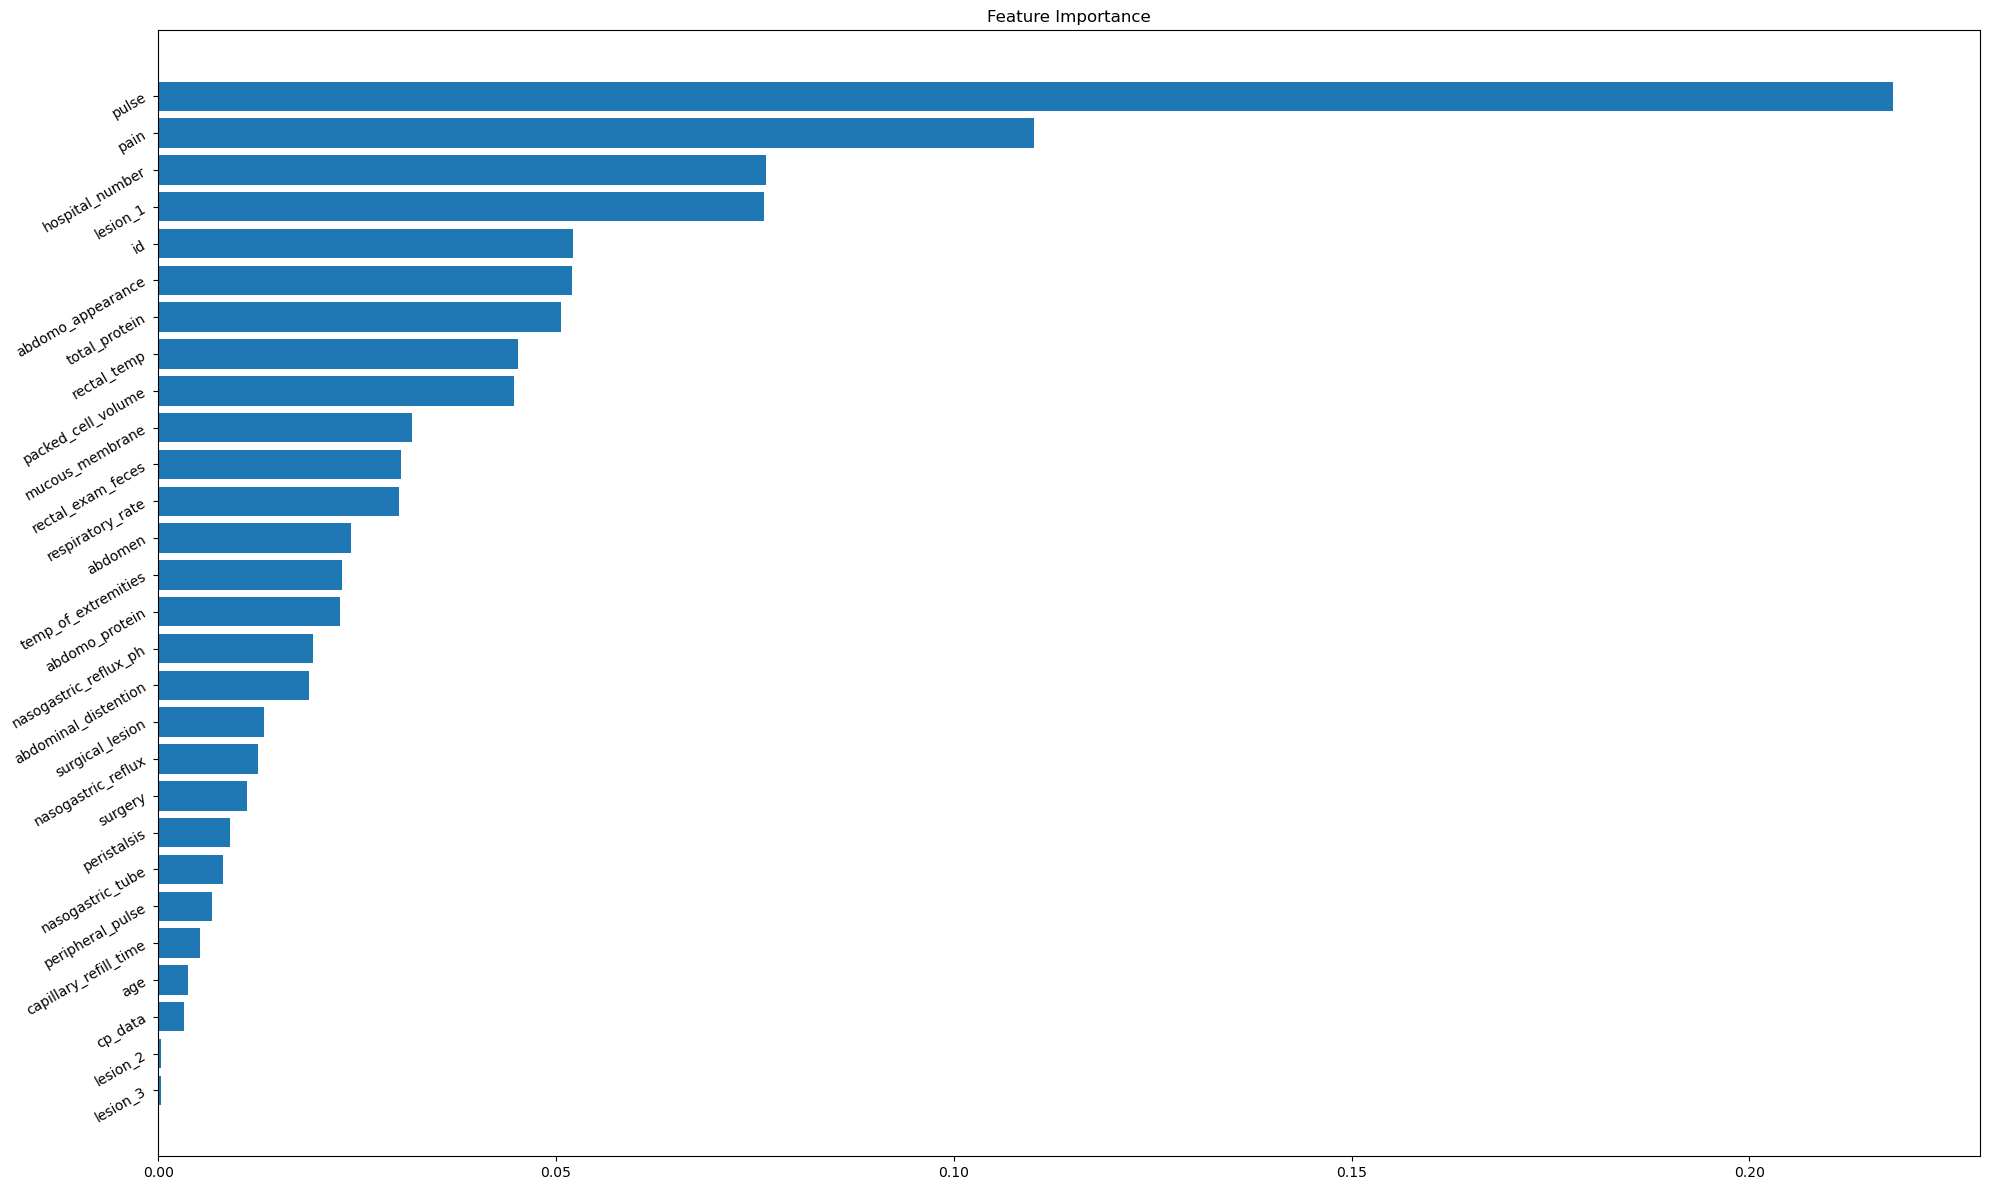

In [110]:
feature_importance = best_gradient_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig, ax = plt.subplots(figsize=(20, 12))

# Use the column names from X_train as feature labels
ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(X_train.columns[sorted_idx], rotation=30)  # Rotate labels to 0 degrees
ax.set_title('Feature Importance')

plt.tight_layout()
plt.show()


In [111]:
#make dataframe of predictions
submission_df = pd.DataFrame({'id': test_data['id'],
                           'outcome': test_predictions})

submission_df.head()

,id,outcome
0,-1.729950,1
1,-1.725746,1
2,-1.721542,1
3,-1.717338,0
4,-1.713134,1


In [86]:
# undo encoding
submission_df['outcome'] = submission_df['outcome'].replace({1: 'lived',
                                                             0: 'died'})

print(len(submission_df))
submission_df.head()

824


,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,died
4,1239,lived


In [65]:
feature_importance = best_gradient_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

# List of feature names in ascending order of importance
sorted_features = X_train.columns[sorted_idx]

# Print the bottom N least important features
bottom_n = 5
print(sorted_features[:bottom_n])


Index(['surgery', 'peristalsis', 'nasogastric_tube', 'capillary_refill_time',
       'surgical_lesion'],
      dtype='object')


In [87]:
submission_df.to_csv("data/submission_gradientBoost_train_data.csv", index=False)
